## Import Required Libraries

In [9]:
import sys
from pathlib import Path

try:
    import pandas as pd
    import matplotlib.pyplot as plt
except ImportError as e:
    print(f"Error: Required libraries not found: {e}")
    sys.exit(1)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Load the Data

In [10]:
def load_dataset(filepath: str) -> pd.DataFrame:
    path = Path(filepath)
    if not path.exists():
        raise FileNotFoundError(f"Dataset not found: {filepath}")
    return pd.read_csv(path)

try:
    train_df = load_dataset('../resources/Train_knight.csv')
    test_df = load_dataset('../resources/Test_knight.csv')
    print(f"✓ Train: {train_df.shape[0]} rows, Test: {test_df.shape[0]} rows")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")
    sys.exit(1)

✓ Train: 398 rows, Test: 171 rows


## Print Original Data

In [11]:
print("Original Training Data:")
print(train_df.head())

Original Training Data:
   Sensitivity  Hability  Strength   Power  Agility  Dexterity  Awareness  \
0        11.80     17.26     75.26   431.9  0.09087    0.06232   0.028530   
1        19.81     22.15    130.00  1260.0  0.09831    0.10270   0.147900   
2        10.97     17.20     71.73   371.5  0.08915    0.11130   0.094570   
3        11.62     18.18     76.38   408.8  0.11750    0.14830   0.102000   
4        11.26     19.83     71.30   388.1  0.08511    0.04413   0.005067   

   Prescience  Reactivity  Midi-chlorien  ...  Evade   Stims  Sprint   Combo  \
0    0.016380      0.1847        0.06019  ...  24.49   86.00   562.0  0.1244   
1    0.094980      0.1582        0.05395  ...  30.88  186.80  2398.0  0.1512   
2    0.036130      0.1489        0.06640  ...  26.87   90.14   476.4  0.1391   
3    0.055640      0.1957        0.07255  ...  25.40   88.14   528.1  0.1780   
4    0.005664      0.1637        0.06343  ...  26.43   76.38   435.9  0.1108   

     Delay  Attunement  Empowere

## Standardize the Data

**Standardization formula**: $z = \frac{x - \mu}{\sigma}$

Where:
- $x$ = original value
- $\mu$ = mean of the column
- $\sigma$ = standard deviation of the column
- $z$ = standardized value (mean=0, std=1)

In [12]:
def standardize(df: pd.DataFrame) -> pd.DataFrame:
    """
    Standardize numeric columns to have mean=0 and std=1.
    Preserves non-numeric columns (like 'knight').
    """
    df_standardized = df.copy()
    
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_cols:
        mean = df[col].mean()
        std = df[col].std()
        if std != 0:
            df_standardized[col] = (df[col] - mean) / std
    
    return df_standardized

In [13]:
train_standardized = standardize(train_df)
test_standardized = standardize(test_df)

print("Standardized Training Data:")
print(train_standardized.head())
print("\nStandardized Test Data:")
print(test_standardized.head())

Standardized Training Data:
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0    -0.671345 -0.446445 -0.700809 -0.646266 -0.407567  -0.811338  -0.769211   
1     1.669067  0.730420  1.622437  1.796448  0.139273  -0.019904   0.741297   
2    -0.913859 -0.460885 -0.850627 -0.824433 -0.533987   0.148653   0.066459   
3    -0.723938 -0.225030 -0.653274 -0.714406  1.549738   0.873840   0.160478   
4    -0.829125  0.172071 -0.868877 -0.775466 -0.830927  -1.167855  -1.066112   

   Prescience  Reactivity  Midi-chlorien  ...     Evade     Stims    Sprint  \
0   -0.865945    0.173241      -0.366082  ... -0.172304 -0.650671 -0.580283   
1    1.220559   -0.825706      -1.306778  ...  0.895035  2.458662  2.836081   
2   -0.341664   -1.176280       0.570091  ...  0.225234 -0.522966 -0.739565   
3    0.176245    0.587899       1.497219  ... -0.020304 -0.584659 -0.643363   
4   -1.150410   -0.618377       0.122356  ...  0.151740 -0.947415 -0.814926   

      Combo     

## Verify Standardization

In [14]:
print("Verification (should be mean≈0, std≈1):")
print(f"Mean of 'Empowered': {train_standardized['Empowered'].mean():.6f}")
print(f"Std of 'Empowered': {train_standardized['Empowered'].std():.6f}")

Verification (should be mean≈0, std≈1):
Mean of 'Empowered': 0.000000
Std of 'Empowered': 1.000000


## Display Scatter Plot with Standardized Data

In [15]:
def create_scatter_plot(df: pd.DataFrame, x_col: str, y_col: str, title: str):
    if 'knight' not in df.columns:
        raise ValueError("DataFrame must have 'knight' column")
    
    jedi = df[df['knight'] == 'Jedi']
    sith = df[df['knight'] == 'Sith']
    
    plt.figure(figsize=(10, 6))
    p1 = plt.scatter(jedi[x_col], jedi[y_col], alpha=0.6, label='Jedi', color='#3498db', s=30)
    p2 = plt.scatter(sith[x_col], sith[y_col], alpha=0.6, label='Sith', color='#e74c3c', s=30)
    
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(handles=[p1, p2])
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

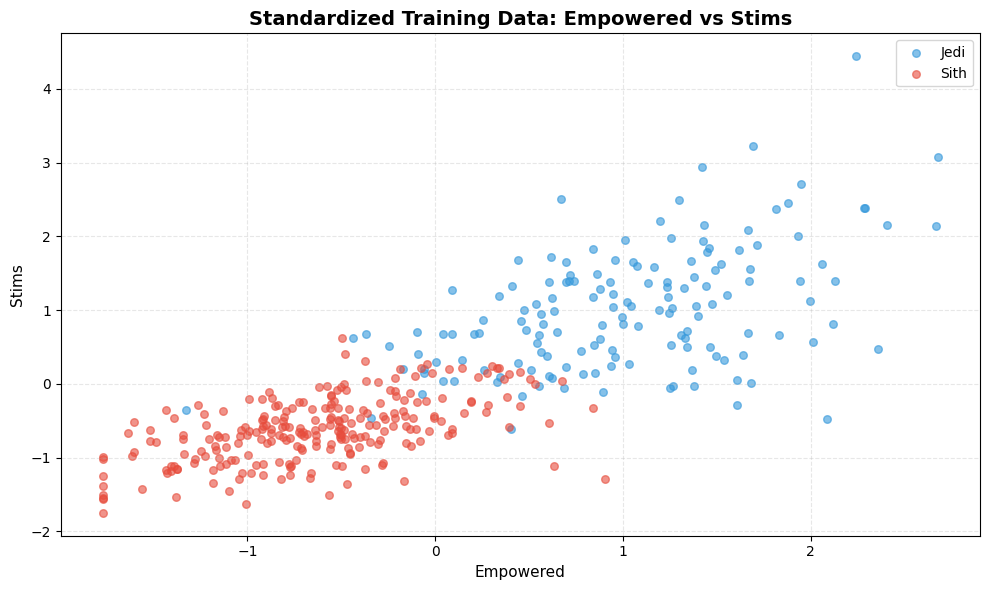

In [16]:
create_scatter_plot(train_standardized, 'Empowered', 'Stims', 'Standardized Training Data: Empowered vs Stims')

## Summary

- Transforms data to have **mean = 0** and **standard deviation = 1**
- Helps ML algorithms that are sensitive to feature scales
- The scatter plot shape stays the same, only the axis values change